Ethical and Explainable AI: -
The UCI machine learning repository download the individual household electric power consumption dataset and answer the following questions: -
1)Time Series Analysis
How does global active power consumption vary across different time scales
2)Peak Demand Analysis
What are the peak electricity uses during the day?
How do weekends and weekdays differ in consumption pattern?
3)Clustering
Can household’s electricity usage pattern be grouped into distinct clusters?
What are the characteristics of different consumption clusters based on uses?

DATA PREPROCESSING

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
file_path = '/content/household_power_consumption.csv'
data = pd.read_csv(file_path, sep=',', low_memory=False)

In [21]:
data.replace('?', pd.NA, inplace=True)
numeric_columns = [
    "Global_active_power", "Global_reactive_power", "Voltage",
    "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"
]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [22]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [23]:
data.dropna(subset=['datetime'], inplace=True)


In [24]:
data.set_index('datetime', inplace=True)

**1.TIME SERIES ANALYSIS **

In [25]:
data['Global_active_power'] = data['Global_active_power'].fillna(0)
hourly_power = data['Global_active_power'].resample('H').mean()
daily_power = data['Global_active_power'].resample('D').mean()
monthly_power = data['Global_active_power'].resample('M').mean()

<ipython-input-25-ef549c85ed47>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_power = data['Global_active_power'].resample('H').mean()
<ipython-input-25-ef549c85ed47>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_power = data['Global_active_power'].resample('M').mean()


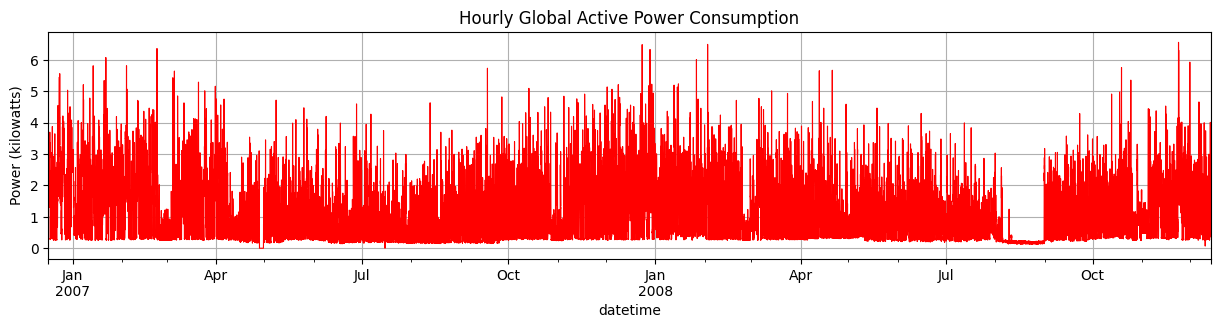

In [28]:
plt.figure(figsize=(15, 10))
#hourly
plt.subplot(3, 1, 1)
hourly_power.plot(color='red', linewidth=0.8)
plt.title('Hourly Global Active Power Consumption')
plt.ylabel('Power (kilowatts)')
plt.grid()

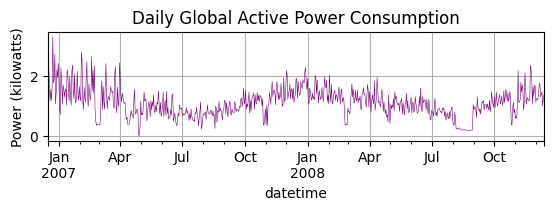

In [31]:
#daily
plt.subplot(3, 1, 2)
daily_power.plot(color='purple', linewidth=0.4)
plt.title('Daily Global Active Power Consumption')
plt.ylabel('Power (kilowatts)')
plt.grid()

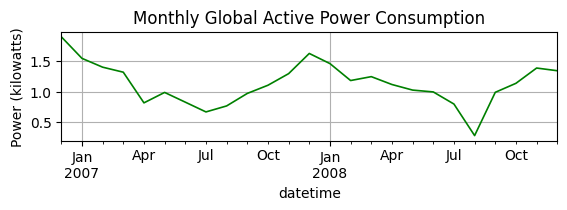

In [32]:
#monthly
plt.subplot(3, 1, 3)
monthly_power.plot(color='green', linewidth=1.2)
plt.title('Monthly Global Active Power Consumption')
plt.ylabel('Power (kilowatts)')
plt.grid()


In [33]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

**2.Peak Demand Analysis**

In [38]:
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['is_weekend'] = data['day_of_week'] >= 5
hourly_avg = data.groupby('hour')['Global_active_power'].mean()

In [39]:
weekday_data = data[data['is_weekend'] == False]
weekend_data = data[data['is_weekend'] == True]


In [40]:
weekday_avg = weekday_data.groupby('hour')['Global_active_power'].mean()
weekend_avg = weekend_data.groupby('hour')['Global_active_power'].mean()

In [41]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

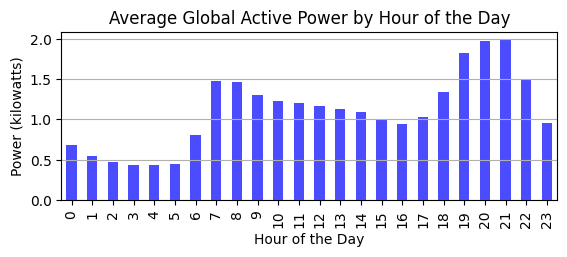

In [42]:
#PEAK USAGE DURING DAY
plt.subplot(2, 1, 1)
hourly_avg.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Global Active Power by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Power (kilowatts)')
plt.grid(axis='y')

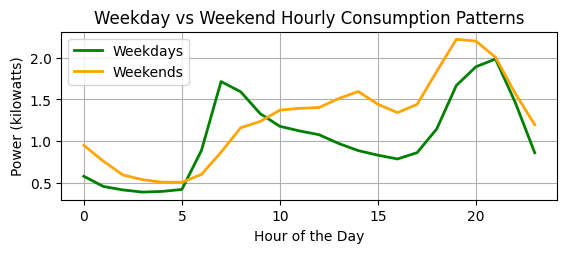

In [43]:
#WEEKDAY VS WEEKEND
plt.subplot(2, 1, 2)
weekday_avg.plot(label='Weekdays', color='green', linewidth=2)
weekend_avg.plot(label='Weekends', color='orange', linewidth=2)
plt.title('Weekday vs Weekend Hourly Consumption Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Power (kilowatts)')
plt.legend()
plt.grid()

3.Clustering


In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
columns_to_numeric = ['Global_active_power', 'Global_reactive_power',
                      'Voltage', 'Global_intensity', 'Sub_metering_1',
                      'Sub_metering_2', 'Sub_metering_3']
for col in columns_to_numeric:
    data[col] = pd.to_numeric(data[col])


In [57]:
features = ['Global_active_power', 'Global_reactive_power',
            'Voltage', 'Global_intensity', 'Sub_metering_1',
            'Sub_metering_2', 'Sub_metering_3']


In [58]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

In [59]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

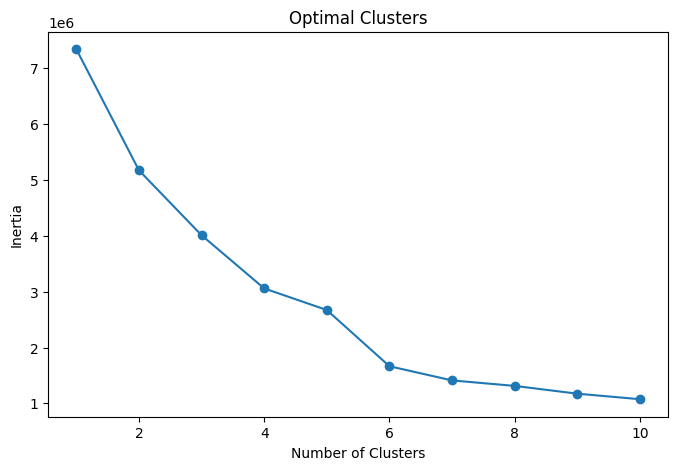

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Optimal Clusters')
plt.show()

In [62]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


In [63]:
cluster_means = data.groupby('Cluster')[features].mean()
print("\nCluster Characteristics:\n", cluster_means)


Cluster Characteristics:
          Global_active_power  Global_reactive_power     Voltage  \
Cluster                                                           
0                   0.433054               0.106368  239.354728   
1                   2.056205               0.131264  238.687599   
2                   4.125730               0.201857  236.145220   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Cluster                                                                    
0                1.905483        0.037400        0.361282        0.284206  
1                8.643203        0.193712        3.247728       15.635901  
2               17.557401       36.363680        4.079636       11.083544  
